In [1]:
# import tensorflow as tf
import cupy as cp

In [2]:
import dask
from dask import delayed
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above

In [3]:
# c=LocalCluster(n_workers=1,threads_per_worker=8,processes=False,memory_limit='1gb',resources={'GPU': 0})
c=LocalCluster(n_workers=1,processes=False,memory_limit='10gb',resources={'GPU': 0})

In [4]:
client=Client(c)

/usr/lib/python3.6/site-packages/dask/context.py:23: UserWarning: The dask.set_options function has been deprecated. Please use dask.config.set instead
  warnings.warn("The dask.set_options function has been deprecated. "


In [5]:
client

Client Scheduler: inproc://136.152.250.183/5322/1,Cluster Workers: 1 Cores: 16 Memory: 10.00 GB


In [6]:
import time

In [7]:
@delayed
def inc(x):
#     time.sleep(1)
    return x + 1

@delayed
def tensor_dot(x, y):
#     x=inc(x)
#     y=inc(y)
    return cp.dot(x, y)#.eval(session=sess)


@delayed
def add(x, y):
    x=inc(x)
    y=inc(y)
    return x + y
@delayed
def add2(x):
#     x=inc(x)
#     y=inc(y)
    return sum([x[k] for k in x.keys()])

In [8]:
a=np.random.randn(100,100)
b=np.random.randn(100,100)

In [9]:
y=tensor_dot(a,b)

In [10]:
y

Delayed('tensor_dot-604fd39c-9aba-42b5-a99a-4bfd39e94498')

In [11]:
y2=client.compute(y).result()

In [12]:
y2

array([[  7.49405942, -28.00982363,   3.28120832, ...,   8.06674032,
         15.37398304,  -1.44103876],
       [ 11.88233089,  28.81064436,   7.88954157, ...,  -1.70863026,
         -6.98193152, -11.73781825],
       [  0.96752991, -14.23584618,   1.5469302 , ...,  -9.75947711,
          6.25077688,  -8.99387395],
       ...,
       [  1.70427294,  -5.98814869,  -7.54603334, ...,  -9.23549013,
         10.08242199,   9.63482929],
       [ -9.6124331 ,   7.49491297,   6.88430752, ...,  -4.01602407,
         11.45203827,   6.59171677],
       [ -8.78926218,  16.48342382, -13.98325002, ...,   5.43354653,
         17.77388617,   0.87903279]])

In [11]:
x=[add(i) for i in np.arange(100)]

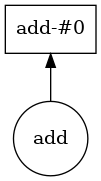

In [12]:
x[0].visualize()

In [13]:
x={}
x[0]=inc(15).compute()
x[1]=inc(30)
x[2]=inc(40)
# x = inc(15)
# y = inc(30)
# x=10
# y=11
total = add2(x)

In [14]:
sum(x)

{0: 16,
 1: Delayed('inc-8298ae42-5db8-466d-8bdd-3376d2ef0157'),
 2: Delayed('inc-bcb30e07-8366-404f-8fe9-91c4615a1beb')}

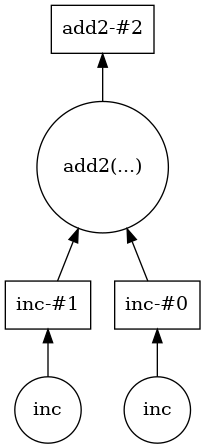

In [15]:
total.visualize()

In [16]:
total.compute()

88

In [10]:
total

Delayed('add-95cb8de7-2258-4bcf-9d76-8f709a9a8fe9')

In [6]:
import os

In [7]:
import random
from time import sleep

def load(address):
    print (os.getpid())
    for i in np.arange(100):
        np.random.rand(100000)
#     sleep(random.random() / 2)

def load_from_sql(address):
    for i in np.arange(100):
        np.random.rand(100000)
#     sleep(random.random() / 2 + 0.5)

def process(data, reference):
    for i in np.arange(100):
        np.random.rand(100000)
#     sleep(random.random() / 2)

def roll(a, b, c):
    for i in np.arange(100):
        np.random.rand(100000)
#         sleep(random.random() / 5)

def compare(a, b):
    for i in np.arange(100):
        np.random.rand(100000)
#     sleep(random.random() / 10)

def reduction(seq):
    for i in np.arange(100):
        np.random.rand(100000)
#     sleep(random.random() / 1)

In [8]:
load = delayed(load)
load_from_sql = delayed(load_from_sql)
process = delayed(process)
roll = delayed(roll)
compare = delayed(compare)
reduction = delayed(reduction)

In [9]:
nr=5
filenames = ['mydata-%d.dat' % i for i in range(nr)]
data = [load(fn) for fn in filenames]

reference = load_from_sql('sql://mytable')
processed = [process(d, reference) for d in data]

rolled = []
for i in range(len(processed) - 2):
    a = processed[i]
    b = processed[i + 1]
    c = processed[i + 2]
    r = roll(a, b, c)
    rolled.append(r)

compared = []
for i in range(nr*2):
    a = random.choice(rolled)
    b = random.choice(rolled)
    c = compare(a, b)
    compared.append(c)

best = reduction(compared)


In [10]:
from dask.distributed import Client
client = Client()

In [14]:
result = best.compute()

In [12]:
print(result)

None


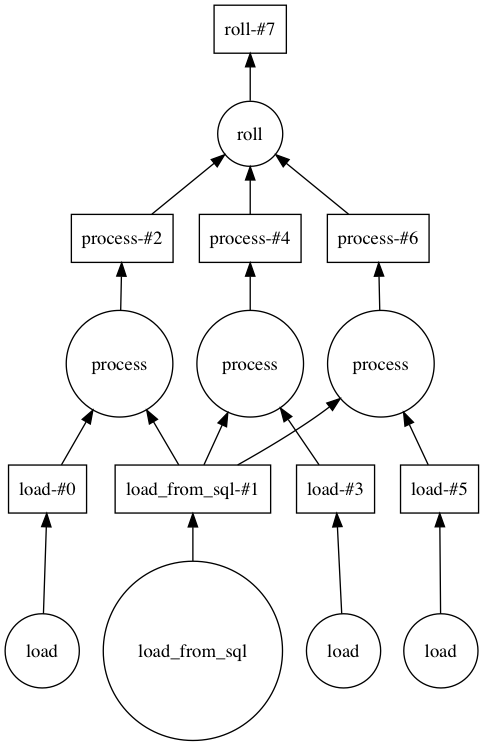

In [15]:
r.visualize()

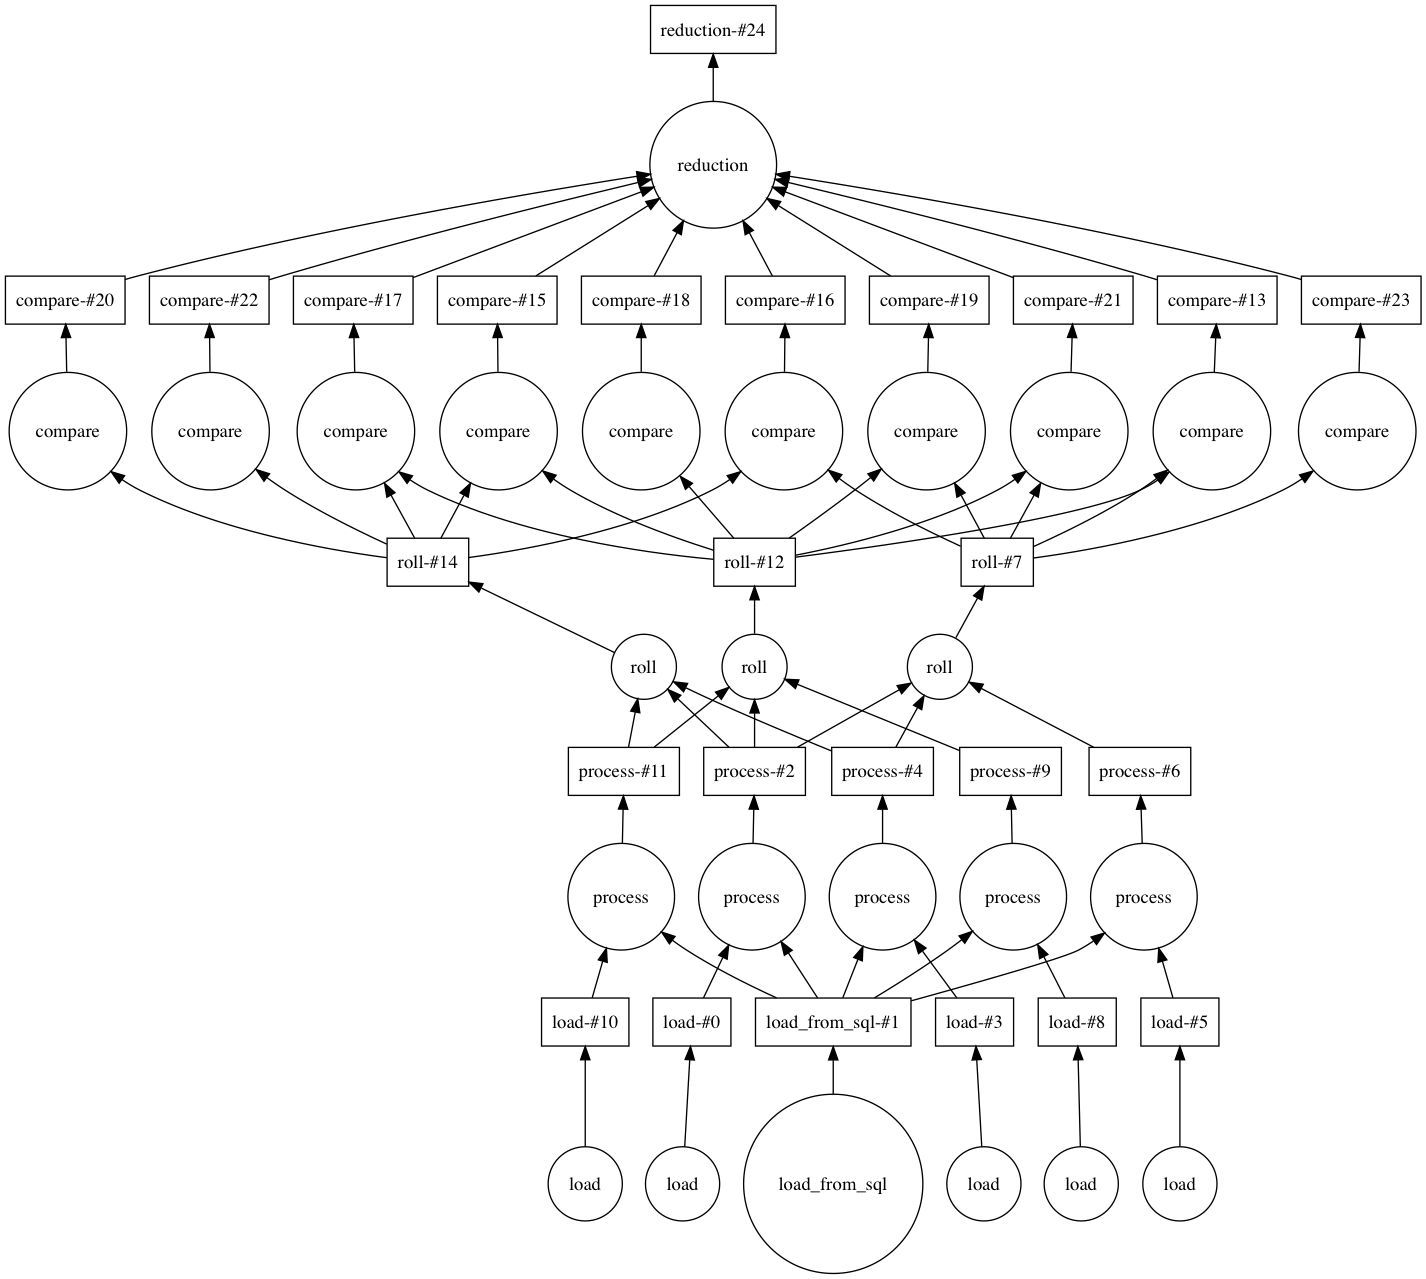

In [13]:
best.visualize()

In [67]:
class power_spec():
    def __init__(self,):
        pass
    def get_pk(self,p=[]):
        return p*2

class ang_pow():
    def __init__(self,ps):
        self.ps=ps
        pass
    
    def get_cl(self,x):
        p=delayed(self.ps.get_pk)(p=1)
        return x+p.compute()
    
    def get_cl_many(self,x):
        y={}
        for i in np.arange(len(x)):
            y[i]=delayed(self.get_cl)(x[i])
        return y
    
    def comb_Y(self,y):
        y2=[]
        for i in y.keys():
            try:
                y2.append(y[i].compute())
            except:
                y2.append(y[i])
        return y2

In [68]:
ps=power_spec()
ap=ang_pow(ps)

In [69]:
y=ap.get_cl_many([1,2,3])

In [70]:
y

{0: Delayed('get_cl-d2c15428-48fe-46c5-96d5-ade46918cbfc'),
 1: Delayed('get_cl-d9554ded-e4d9-40a0-bfd5-265980dc8ae2'),
 2: Delayed('get_cl-7dce69fd-ad8f-41cf-8303-1754c10fda04')}

In [71]:
ap.comb_Y(y)

[3, 4, 5]

In [72]:
cl2=delayed(ap.get_cl_many)
comb2=delayed(ap.comb_Y)

In [73]:
y=cl2([1,2,3])

In [74]:
comb2(y).compute()

[3, 4, 5]

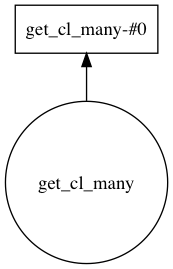

In [75]:
y.visualize()